## PYTHON JOURNEY MACHINE & DEEP LEARNING
### Trabalho prático usando Python
 
### Modelo de regressão linear múltipla

Dataset Bike Sharing

Descrição: Os sistemas de compartilhamento de bicicletas são uma nova geração de aluguel de bicicletas tradicional, onde todo o processo de associação, locação e devolução tornou-se automático. Através destes sistemas, o usuário pode facilmente alugar uma bicicleta a partir de uma determinada posição e retornar em outra posição. Atualmente, existem cerca de 500 programas de compartilhamento de bicicletas em todo o mundo, compostos por mais de 500 mil bicicletas. Hoje, existe um grande interesse nesses sistemas devido ao seu importante papel no trânsito, questões ambientais e de saúde.

Fonte de dados: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset


Dicionário de variáveis:
- instant: ID
- dteday: ID
- season: (1:winter, 2=springer, 3:summer, 4:fall)
- yr: year (0: 2011, 1:2012)
- mnth: ( 1 to 12)
- holiday (0=no;1=yes)
- weekday (day of the week)
- workingday (0=no;1=yes) 
- weathersit (1: Clear, Few clouds , Partly cloudy, Partly cloudy; 2: Mist + Cloudy, Mist + Broken clouds, 
              Mist + Few clouds, Mist;3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + 
              Scattered clouds;4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) 
- temp (Normalized temperature in Celsius). The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, 
        t_max=+39 (only in hourly scale)
- atemp (Normalized feeling temperature in Celsius). The values are derived via (t-t_min)/(t_max-t_min),
   t_min=-16, t_max=+50 (only in hourly scale)
- hum (Normalized humidity_. The values are divided to 100 (max)
- windspeed	Normalized wind speed. The values are divided to 67 (max)
- casual (count of casual users)
- registered (count of registered users) 
- cnt (count of total rental bikes including both casual and registered)


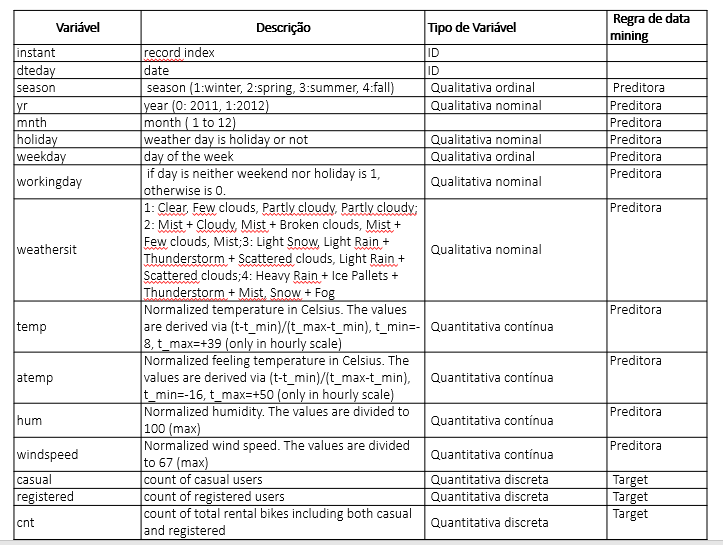



In [1]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import pearsonr
import statsmodels.api as sm



In [2]:
# Importar a base de dados 
df=pd.read_csv(r'C:\Users\regin\FIAP\Shift\Imersao_Python\Turma3\trab5\Bike_Sharing.csv')

In [3]:
# Visualizar os dados
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [4]:
# Verificar os formatos das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Análise descritiva
df.describe().round(2)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.00,731.00,731.0,731.00,731.00,731.0,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00
mean,366.00,2.50,0.5,6.52,0.03,3.0,0.68,1.40,0.50,0.47,0.63,0.19,848.18,3656.17,4504.35
std,211.17,1.11,0.5,3.45,0.17,2.0,0.47,0.54,0.18,0.16,0.14,0.08,686.62,1560.26,1937.21
min,1.00,1.00,0.0,1.00,0.00,0.0,0.00,1.00,0.06,0.08,0.00,0.02,2.00,20.00,22.00
25%,183.50,2.00,0.0,4.00,0.00,1.0,0.00,1.00,0.34,0.34,0.52,0.13,315.50,2497.00,3152.00
50%,366.00,3.00,1.0,7.00,0.00,3.0,1.00,1.00,0.50,0.49,0.63,0.18,713.00,3662.00,4548.00
75%,548.50,3.00,1.0,10.00,0.00,5.0,1.00,2.00,0.66,0.61,0.73,0.23,1096.00,4776.50,5956.00
max,731.00,4.00,1.0,12.00,1.00,6.0,1.00,3.00,0.86,0.84,0.97,0.51,3410.00,6946.00,8714.00


In [6]:
# Pre-processing
# Mudar o formato da variável quantitativa em qualitativa
df['season']= df['season'].astype(str)
df['yr']= df['yr'].astype(str)
df['holiday']= df['holiday'].astype(str)
df['weekday']= df['weekday'].astype(str)
df['workingday']= df['workingday'].astype(str)
df['weathersit']= df['weathersit'].astype(str)
df['mnth']= df['mnth'].astype(str)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    object 
 3   yr          731 non-null    object 
 4   mnth        731 non-null    object 
 5   holiday     731 non-null    object 
 6   weekday     731 non-null    object 
 7   workingday  731 non-null    object 
 8   weathersit  731 non-null    object 
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(4), object(8)
memory usage: 91.5+ KB


In [8]:
df.describe().round(2)

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00
mean,366.00,0.50,0.47,0.63,0.19,848.18,3656.17,4504.35
std,211.17,0.18,0.16,0.14,0.08,686.62,1560.26,1937.21
min,1.00,0.06,0.08,0.00,0.02,2.00,20.00,22.00
25%,183.50,0.34,0.34,0.52,0.13,315.50,2497.00,3152.00
50%,366.00,0.50,0.49,0.63,0.18,713.00,3662.00,4548.00
75%,548.50,0.66,0.61,0.73,0.23,1096.00,4776.50,5956.00
max,731.00,0.86,0.84,0.97,0.51,3410.00,6946.00,8714.00


In [9]:
# modificando os nomes das colunas
df.columns = ['ID', 'data', 'estacao','ano','mes', 'feriado','dia_semana','dia_util','clima', 'temperatura','sensacao_termica',
             'umidade','vel_vento','casual', 'registrada', 'total']

In [10]:
# Verificar os nomes das variáveis
# informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                731 non-null    int64  
 1   data              731 non-null    object 
 2   estacao           731 non-null    object 
 3   ano               731 non-null    object 
 4   mes               731 non-null    object 
 5   feriado           731 non-null    object 
 6   dia_semana        731 non-null    object 
 7   dia_util          731 non-null    object 
 8   clima             731 non-null    object 
 9   temperatura       731 non-null    float64
 10  sensacao_termica  731 non-null    float64
 11  umidade           731 non-null    float64
 12  vel_vento         731 non-null    float64
 13  casual            731 non-null    int64  
 14  registrada        731 non-null    int64  
 15  total             731 non-null    int64  
dtypes: float64(4), int64(4), object(8)
memory us

In [11]:
# Selecionar as variáveis quantitativas
var_num = ['temperatura','sensacao_termica','umidade','vel_vento', 'total']

In [12]:
# Selecionar as variáveis qualitativas
var_cat =['estacao','ano','mes', 'feriado','dia_semana','dia_util','clima']

In [13]:
# Análise descritiva: medidas resumo
df[var_num].describe().round(2)

,temperatura,sensacao_termica,umidade,vel_vento,total
count,731.00,731.00,731.00,731.00,731.00
mean,0.50,0.47,0.63,0.19,4504.35
std,0.18,0.16,0.14,0.08,1937.21
min,0.06,0.08,0.00,0.02,22.00
25%,0.34,0.34,0.52,0.13,3152.00
50%,0.50,0.49,0.63,0.18,4548.00
75%,0.66,0.61,0.73,0.23,5956.00
max,0.86,0.84,0.97,0.51,8714.00


C:\Users\regin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


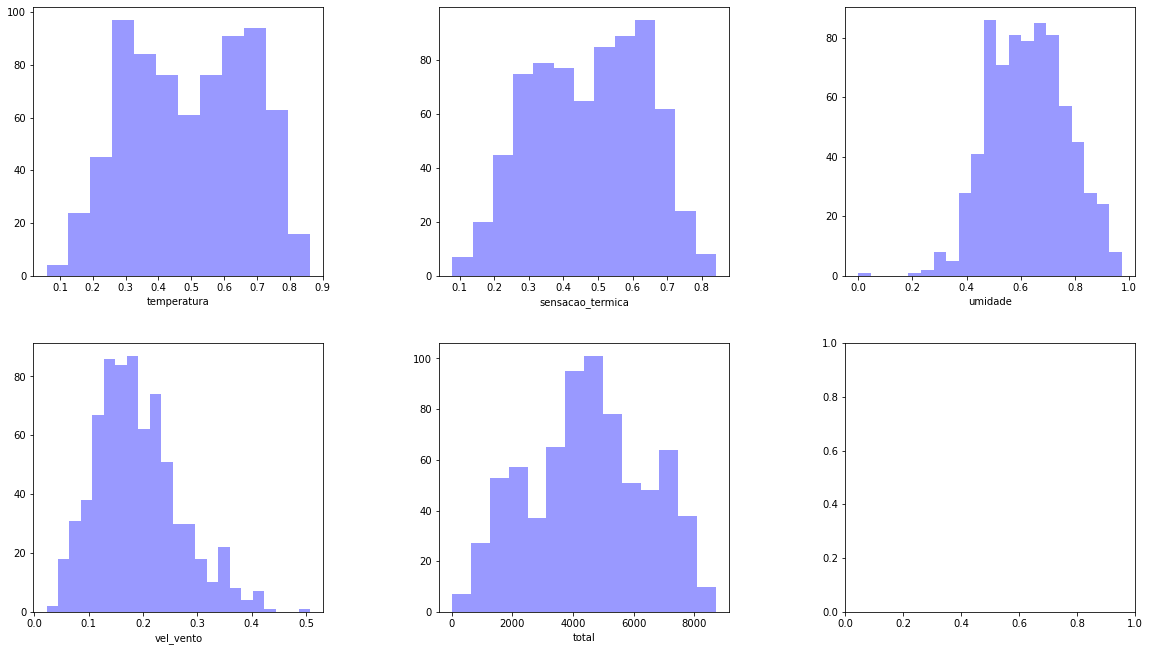

In [14]:
# Análise exploratória dos dados usando o gráfico histograma
features = var_num
fig,axs=plt.subplots(nrows=2, ncols=3, figsize=(18,10))
for col, ax in zip(features[0:], axs.ravel()):
    x=df.loc[:, col]
    sns.distplot(x, ax=ax, color="blue", kde=False)
    plt.subplots_adjust(top=0.92,bottom=0.08, left=0.10,right=0.95,hspace=0.25,wspace=0.4)

C:\Users\regin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\regin\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\regin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\regin\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_w

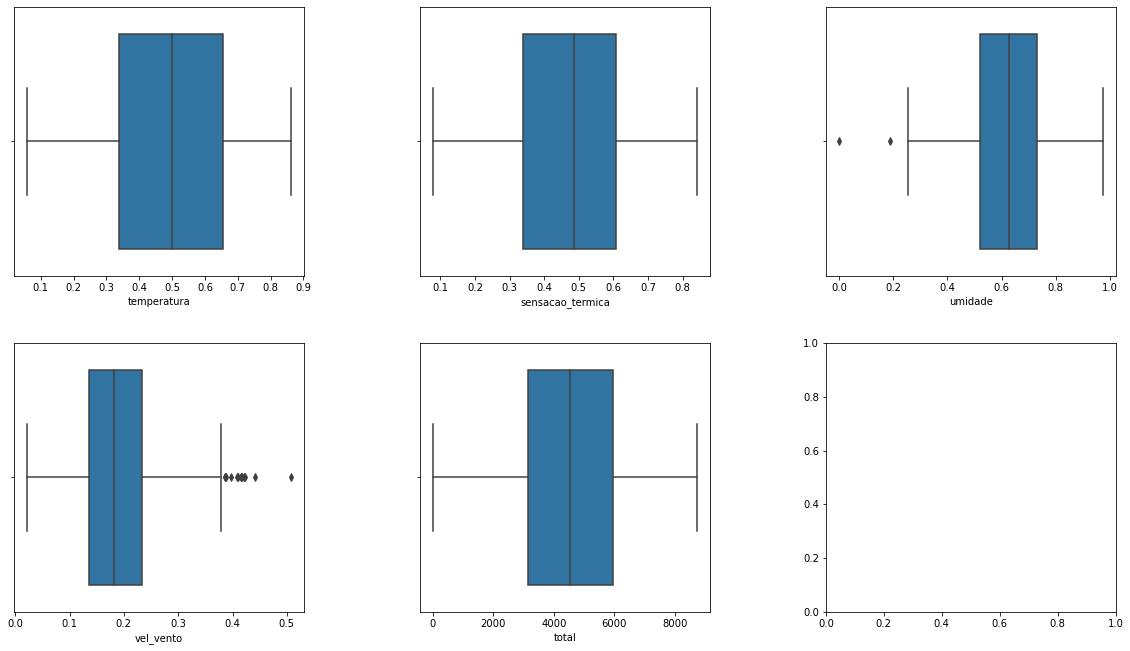

In [15]:
# Análise exploratória dos dados usando o gráfico Box Plot
features = var_num
fig,axs=plt.subplots(nrows=2, ncols=3, figsize=(18,10))
for col, ax in zip(features[0:], axs.ravel()):
    x=df.loc[:, col]
    sns.boxplot(x, ax=ax, orient='v')
    plt.subplots_adjust(top=0.92,bottom=0.08, left=0.10,right=0.95,hspace=0.25,wspace=0.4)

C:\Users\regin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\regin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\regin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\regin\anaconda3\lib\si

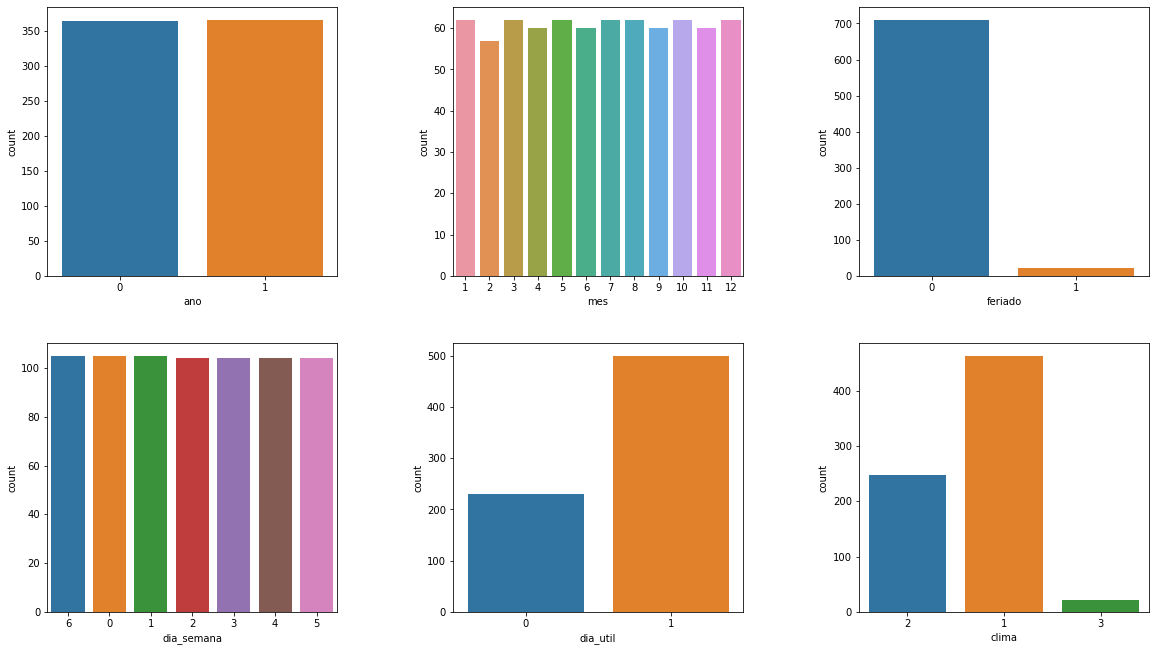

In [16]:
# Análise das variáveis qualitativas
features = var_cat
fig,axs=plt.subplots(nrows=2, ncols=3, figsize=(18,10))
for col, ax in zip(features[1:], axs.ravel()):
    x=df.loc[:, col]
    sns.countplot(x, ax=ax, orient='v')
    plt.subplots_adjust(top=0.92,bottom=0.08, left=0.10,right=0.95,hspace=0.25,wspace=0.4)

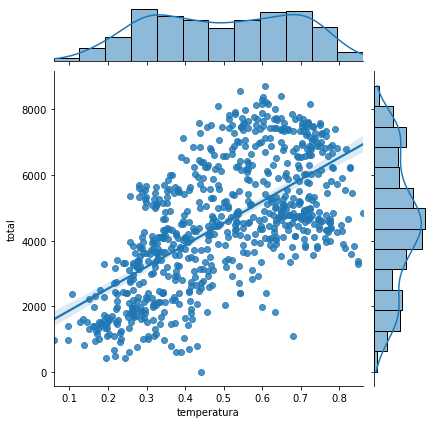

In [17]:
# Gráfico de dispersão 
sns.jointplot(x='temperatura', y='total', data=df, kind='reg')


In [18]:
# Correlação entre CNT e Temperatura
print('Correlação de Pearson entre o total de bikes alugadas e temperatura')
pearsonr(df['temperatura'], df['total'])

Correlação de Pearson entre o total de bikes alugadas e temperatura


(0.627494009033492, 2.8106223975907754e-81)

### Correlação de Pearson

### Teste de hipótese
### H0: correlação = 0
### H1: correlação <> 0

### erro decisão: 0,05 ou 5% --> nível de significância do teste de hipótese
### Critério de decisão:
### p-valor < critério de decisão --> rejeito H0
### p-valor < critério de decisão --> não rejeito H0

### conclusão: p-valor < 0,05 --> logo existe correlação entre as duas variáveis

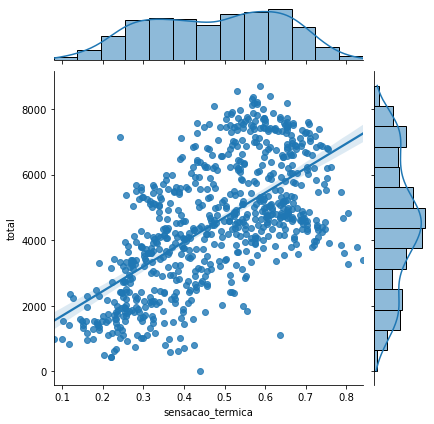

In [19]:
# Gráfico de dispersão 
sns.jointplot(x='sensacao_termica', y='total', data=df, kind='reg')


In [20]:
# Correlação entre CNT e Sensação térmica
print('Correlação de Pearson entre o total de bikes alugadas e sensação térmica')
pearsonr(df['temperatura'], df['total'])

Correlação de Pearson entre o total de bikes alugadas e sensação térmica


(0.627494009033492, 2.8106223975907754e-81)

In [ ]:
# Interpretação do teste de hipótese
correlação = 0.06274
p-valor = 2.8106223975907754e-81 = 0,000000000 < 0,000
Conclusão: p-valor < 0,05 --> rejeito H0. Logo, existe correlação entre sensação térmica e total com erro de 5%

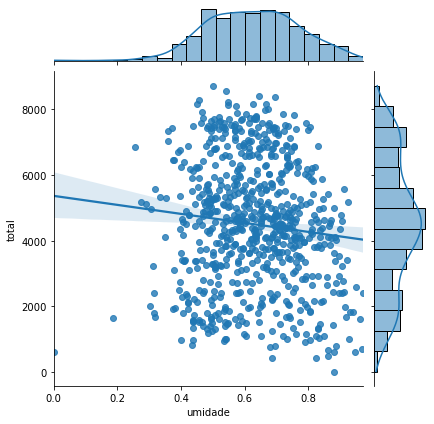

In [21]:
# Gráfico de dispersão entre CNT e Umidade
sns.jointplot(x='umidade', y='total', data=df, kind='reg')

In [22]:
# Correlação entre CNT e umidade
print('Correlação de Pearson entre o total de bikes alugadas e umidade')
pearsonr(df['umidade'], df['total'])

Correlação de Pearson entre o total de bikes alugadas e umidade


(-0.10065856213715527, 0.006454143325438633)

In [ ]:
# Interpretação do teste de correlação
correlação = -0,10
p-valor = 0.0064
critério de decisão: p-valor < 0,05 --> existe correlação negativa, porém fraca.

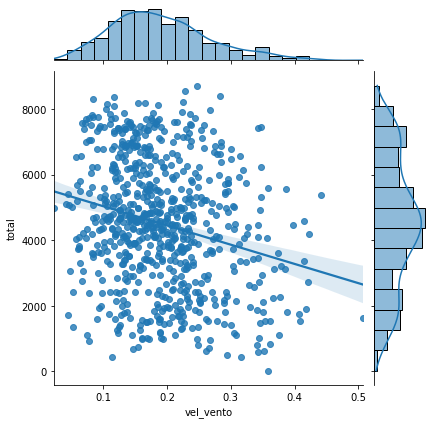

In [23]:
# Gráfico de dispersão entre CNT e velocidade do vento
sns.jointplot(x='vel_vento', y='total', data=df, kind='reg')

In [24]:
#  Correlação entre CNT e Velocidade do vento
print('Correlação de Pearson entre o total de bikes alugadas e velocidade do vento')
pearsonr(df['vel_vento'], df['total'])

Correlação de Pearson entre o total de bikes alugadas e velocidade do vento


(-0.23454499742167, 1.3599586778869642e-10)

In [25]:
# Matriz de Correlação de Pearson
df[var_num].corr(method='pearson')

,temperatura,sensacao_termica,umidade,vel_vento,total
temperatura,1.000000,0.991702,0.126963,-0.157944,0.627494
sensacao_termica,0.991702,1.000000,0.139988,-0.183643,0.631066
umidade,0.126963,0.139988,1.000000,-0.248489,-0.100659
vel_vento,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
total,0.627494,0.631066,-0.100659,-0.234545,1.000000


<AxesSubplot:>

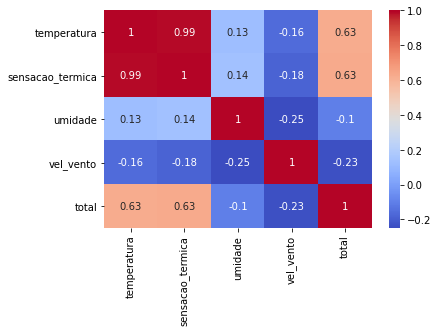

In [26]:
# Matriz de correlação
sns.heatmap(df[var_num].corr(), cmap='coolwarm', annot = True)

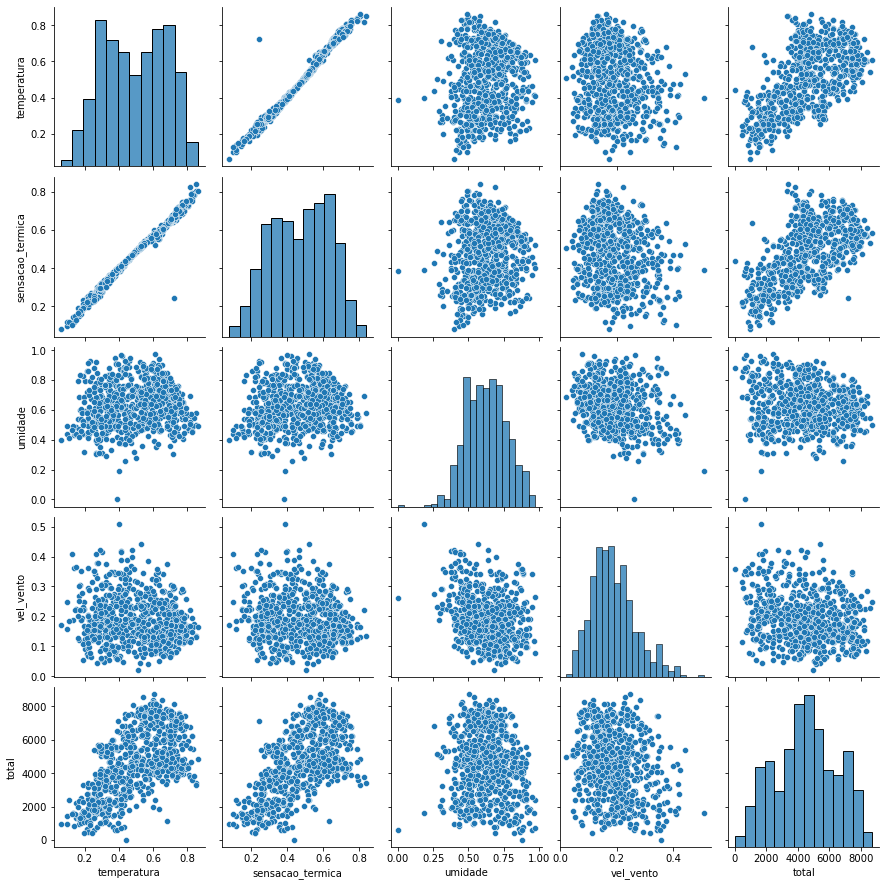

In [27]:
# Análise exploratória dos dados
#sns.pairplot()
sns.pairplot(df[var_num])

## Análise bivariada

<AxesSubplot:xlabel='estacao', ylabel='total'>

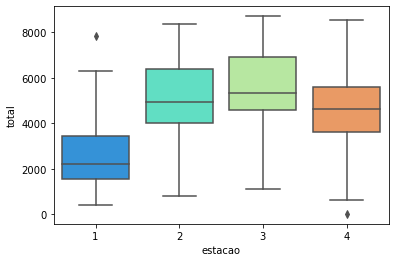

In [28]:
# Análise quantitativa versus qualitativa
# Variáveis qualitativas
# Identificar se há associação entre CNT ( variável quantitativa) e Estação do ano (variável qualitativa)
# Box Plot
sns.boxplot(x='estacao', y='total', data=df, palette = 'rainbow')

<AxesSubplot:xlabel='mes', ylabel='total'>

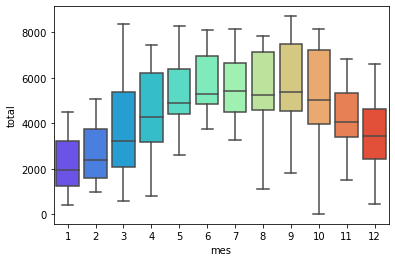

In [29]:
# Box Plot total versys mês
sns.boxplot(x='mes', y='total', data=df, palette = 'rainbow')

<AxesSubplot:xlabel='clima', ylabel='total'>

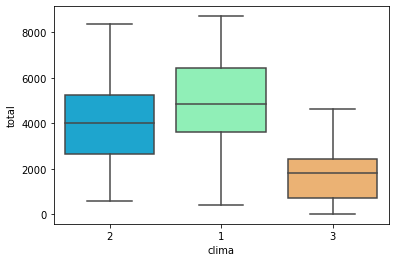

In [30]:
# Box Plot total versys clima
sns.boxplot(x='clima', y='total', data=df, palette = 'rainbow')

<AxesSubplot:xlabel='dia_semana', ylabel='total'>

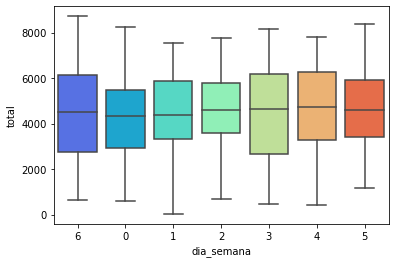

In [31]:
# Box Plot total versys dia da semana
sns.boxplot(x='dia_semana', y='total', data=df, palette = 'rainbow')

<AxesSubplot:xlabel='feriado', ylabel='total'>

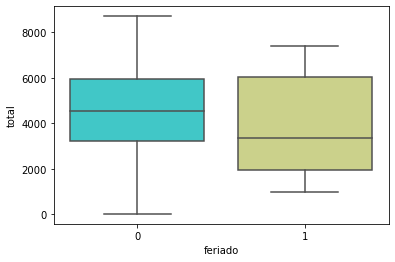

In [32]:
# Box Plot total versys feriado
sns.boxplot(x='feriado', y='total', data=df, palette = 'rainbow')

<AxesSubplot:xlabel='dia_util', ylabel='total'>

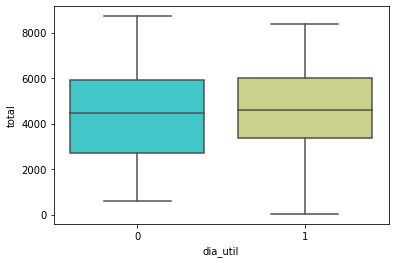

In [33]:
# Box Plot total versys dia útil
sns.boxplot(x='dia_util', y='total', data=df, palette = 'rainbow')

### Teste qui-quadrado é utilizado para descobrir associação entre duas variáveis qualitativas
### transformar a variável total de bikes alugadas em qualitativa --> faixa cnt (qualitativa ordinal) vs estação do ano (qualitativa ordinal)
### criar a faixa_cnt você usar os quartis 

In [41]:
# Criar uma variável outlier_renda no Data Frame, sendo 0 = não outlier, 1= outlier e 2 = ponto extremo 
minimo = min(df['total'])   
Q1 =  np.percentile(df['total'], 25)
Q2 =  np.percentile(df['total'], 50)
Q3 =  np.percentile(df['total'], 75)
maximo = max(df['total'])    
print(minimo, Q1, Q2, Q3, maximo)


22 3152.0 4548.0 5956.0 8714


In [43]:
# Criar a variável faixa de quantidade de bikes alugadas
df.loc[(df.total >= minimo) & (df.total <= Q1), 'fx_total']=1.0
df.loc[(df.total > Q1) & (df.total <= Q2), 'fx_total']=2.0
df.loc[(df.total >  Q2)  & (df.total <=Q3), 'fx_total']=3.0
df.loc[(df.total >  Q3) & (df.total <= maximo), 'fx_total']=4.0

In [44]:
df.head()

,ID,data,estacao,ano,mes,feriado,dia_semana,dia_util,clima,temperatura,sensacao_termica,umidade,vel_vento,casual,registrada,total,fx_total
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1.0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1.0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1.0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1.0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1.0


In [47]:
# Teste qui-quadrado entre total e estação do ano
# Existe associação?
table1 = pd.crosstab(df.fx_total,df.estacao)
table1

estacao,1,2,3,4
fx_total,,,,
1.0,122,28,4,29
2.0,43,43,41,56
3.0,11,51,64,56
4.0,5,62,79,37


In [48]:
# importar as bibliotecas do teste qui-quadrado
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [49]:
# estatísticas stat = valor do qui-quadrado, p= p-value, dof=graus de liberdade, expected = valores esperados
stat, p, dof, expected = chi2_contingency(table1)


In [50]:
# Interpretação do teste qui-quadrado
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=9
[[45.3119015  46.0629275  47.06429549 44.56087551]
 [45.3119015  46.0629275  47.06429549 44.56087551]
 [45.06429549 45.81121751 46.80711354 44.31737346]
 [45.3119015  46.0629275  47.06429549 44.56087551]]
probability=0.950, critical=16.919, stat=285.814
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [51]:
# Teste qui-quadrado entre total e dia da semana
# Existe associação?
table2 = pd.crosstab(df.fx_total,df.dia_semana)
table2

dia_semana,0,1,2,3,4,5,6
fx_total,,,,,,,
1.0,29,25,24,29,25,20,31
2.0,27,34,27,21,23,29,22
3.0,27,21,30,27,25,29,23
4.0,22,25,23,27,31,26,29


In [52]:
# estatísticas stat = valor do qui-quadrado, p= p-value, dof=graus de liberdade, expected = valores esperados
stat, p, dof, expected = chi2_contingency(table2)


In [53]:
# Interpretação do teste qui-quadrado
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=18
[[26.28590971 26.28590971 26.03556772 26.03556772 26.03556772 26.03556772
  26.28590971]
 [26.28590971 26.28590971 26.03556772 26.03556772 26.03556772 26.03556772
  26.28590971]
 [26.14227086 26.14227086 25.89329685 25.89329685 25.89329685 25.89329685
  26.14227086]
 [26.28590971 26.28590971 26.03556772 26.03556772 26.03556772 26.03556772
  26.28590971]]
probability=0.950, critical=28.869, stat=12.707
Independent (fail to reject H0)
significance=0.050, p=0.809
Independent (fail to reject H0)


In [54]:
# Criar variáveis dummies para cada variável qualitativa e excluir a primeira categoria de cada variável
var_dummies = pd.get_dummies(df[var_cat], drop_first = True)
print(var_dummies)


     estacao_2  estacao_3  estacao_4  ano_1  mes_10  mes_11  mes_12  mes_2  \
0            0          0          0      0       0       0       0      0   
1            0          0          0      0       0       0       0      0   
2            0          0          0      0       0       0       0      0   
3            0          0          0      0       0       0       0      0   
4            0          0          0      0       0       0       0      0   
..         ...        ...        ...    ...     ...     ...     ...    ...   
726          0          0          0      1       0       0       1      0   
727          0          0          0      1       0       0       1      0   
728          0          0          0      1       0       0       1      0   
729          0          0          0      1       0       0       1      0   
730          0          0          0      1       0       0       1      0   

     mes_3  mes_4  ...  feriado_1  dia_semana_1  dia_semana_2  

In [55]:
# Merge dos arquivos df e dummies
df = pd.concat([df, var_dummies], axis=1)

print(df.head())

   ID        data estacao ano mes feriado dia_semana dia_util clima  \
0   1  2011-01-01       1   0   1       0          6        0     2   
1   2  2011-01-02       1   0   1       0          0        0     2   
2   3  2011-01-03       1   0   1       0          1        1     1   
3   4  2011-01-04       1   0   1       0          2        1     1   
4   5  2011-01-05       1   0   1       0          3        1     1   

   temperatura  ...  feriado_1  dia_semana_1  dia_semana_2  dia_semana_3  \
0     0.344167  ...          0             0             0             0   
1     0.363478  ...          0             0             0             0   
2     0.196364  ...          0             1             0             0   
3     0.200000  ...          0             0             1             0   
4     0.226957  ...          0             0             0             1   

   dia_semana_4  dia_semana_5  dia_semana_6  dia_util_1  clima_2  clima_3  
0             0             0           

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                731 non-null    int64  
 1   data              731 non-null    object 
 2   estacao           731 non-null    object 
 3   ano               731 non-null    object 
 4   mes               731 non-null    object 
 5   feriado           731 non-null    object 
 6   dia_semana        731 non-null    object 
 7   dia_util          731 non-null    object 
 8   clima             731 non-null    object 
 9   temperatura       731 non-null    float64
 10  sensacao_termica  731 non-null    float64
 11  umidade           731 non-null    float64
 12  vel_vento         731 non-null    float64
 13  casual            731 non-null    int64  
 14  registrada        731 non-null    int64  
 15  total             731 non-null    int64  
 16  fx_total          731 non-null    float64
 1

In [59]:
# Fazer uma cópia do arquivo df e apagar as variáveis não utilizadas no modelo
df_copy  = df.copy()

df_copy= df_copy.drop(['ID', 'data','ano','mes', 'feriado', 'dia_util','estacao', 'dia_semana','clima', 
                       'casual', 'registrada', 'fx_total'], axis=1)



In [60]:
df_copy.head()

,temperatura,sensacao_termica,umidade,vel_vento,total,estacao_2,estacao_3,estacao_4,ano_1,mes_10,...,feriado_1,dia_semana_1,dia_semana_2,dia_semana_3,dia_semana_4,dia_semana_5,dia_semana_6,dia_util_1,clima_2,clima_3
0,0.344167,0.363625,0.805833,0.160446,985,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.363478,0.353739,0.696087,0.248539,801,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.196364,0.189405,0.437273,0.248309,1349,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0.200000,0.212122,0.590435,0.160296,1562,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0.226957,0.229270,0.436957,0.186900,1600,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


### Modelo de Regressão Linear Múltipla

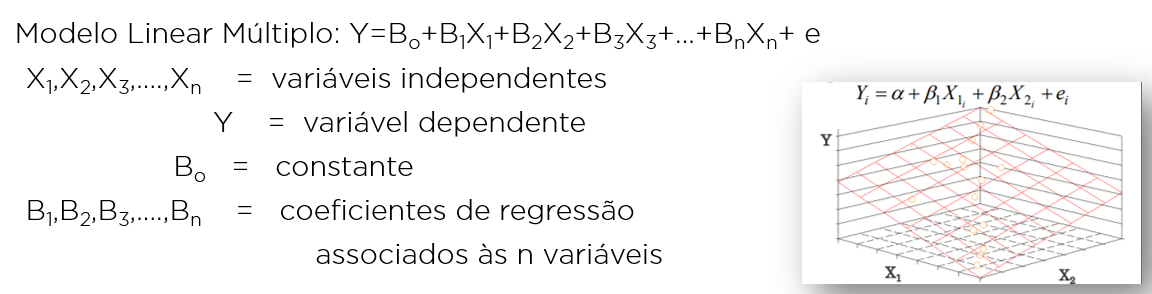

In [61]:
# Selecionar as variáveis preditoras e a resposta do modelo
# Selecionar as variáveis preditoras e a resposta do modelo
X = df[['estacao_2', 'estacao_3', 'estacao_4']]
y = df['total']

### Dividir a amostra em treino e validação

In [62]:
# Importar as bibliotecas para dividir a amostra em treino e validação
from sklearn.model_selection import train_test_split

# importar a biblioteca Regressão Linear
from sklearn.linear_model import LinearRegression


In [63]:
# random_state é o número aleatório usado para sortear as amostras. O seu uso é opcional.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

In [64]:
# Regressão linear múltipla
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [65]:
# Intercepto do modelo (b0)

print(lm.intercept_)

2603.929687499999


In [66]:
# Os coeficientes do modelo (b1,b2,b3)
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df.round(3)

,Coefficient
estacao_2,2318.023
estacao_3,3079.203
estacao_4,2161.986


In [ ]:
# Modelo Regressão Linear Múltipla
# Total = 2603.92 + 2318.023 * estacao_2 + 3079.203*estacao_3 + 2161.986* estacao_4


### Selecionar todas as variáveis preditoras no modelo

In [67]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temperatura       731 non-null    float64
 1   sensacao_termica  731 non-null    float64
 2   umidade           731 non-null    float64
 3   vel_vento         731 non-null    float64
 4   total             731 non-null    int64  
 5   estacao_2         731 non-null    uint8  
 6   estacao_3         731 non-null    uint8  
 7   estacao_4         731 non-null    uint8  
 8   ano_1             731 non-null    uint8  
 9   mes_10            731 non-null    uint8  
 10  mes_11            731 non-null    uint8  
 11  mes_12            731 non-null    uint8  
 12  mes_2             731 non-null    uint8  
 13  mes_3             731 non-null    uint8  
 14  mes_4             731 non-null    uint8  
 15  mes_5             731 non-null    uint8  
 16  mes_6             731 non-null    uint8  
 1

In [68]:
# Selecionar as variáveis preditoras e a resposta
X = df_copy.drop('total', axis=1)
y = df_copy['total']

In [69]:
# random_state é o número aleatório usado para sortear as amostras. O seu uso é opcional.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

In [70]:
# importar bibliiotecas
import statsmodels.api as sm
from scipy import stats

In [71]:
#Modelo de regressão linear múltipla
X_ = sm.add_constant(X_train)
model = sm.OLS(y_train, X_).fit()
#results = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     94.82
Date:                Mon, 16 Aug 2021   Prob (F-statistic):          2.24e-176
Time:                        21:18:27   Log-Likelihood:                -4122.1
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     482   BIC:                             8425.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1591.3543    317.018  

In [72]:
# Importar a biblioteca
# Medidas de erro
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [73]:
X_t = sm.add_constant(X_test)

In [74]:
# Calculando o valor predito da variável resposta na amostra treino e teste
y_train_pred = model.predict(X_)
y_test_pred  = model.predict(X_t)

In [75]:
y_train_pred

53     2271.479856
117    3463.765869
708    4369.838112
60     2447.332250
72     2686.379368
          ...     
75     2911.593105
599    6911.352591
575    6084.990412
337    3104.483433
523    6649.901238
Length: 511, dtype: float64

In [76]:
y_test_pred

479    5632.004181
648    6867.434773
139    4673.161982
601    6697.657884
116    3213.959670
          ...     
492    5674.768804
212    5054.680423
438    5995.607143
83     3292.420955
176    4780.541103
Length: 220, dtype: float64

### Medidas de erro

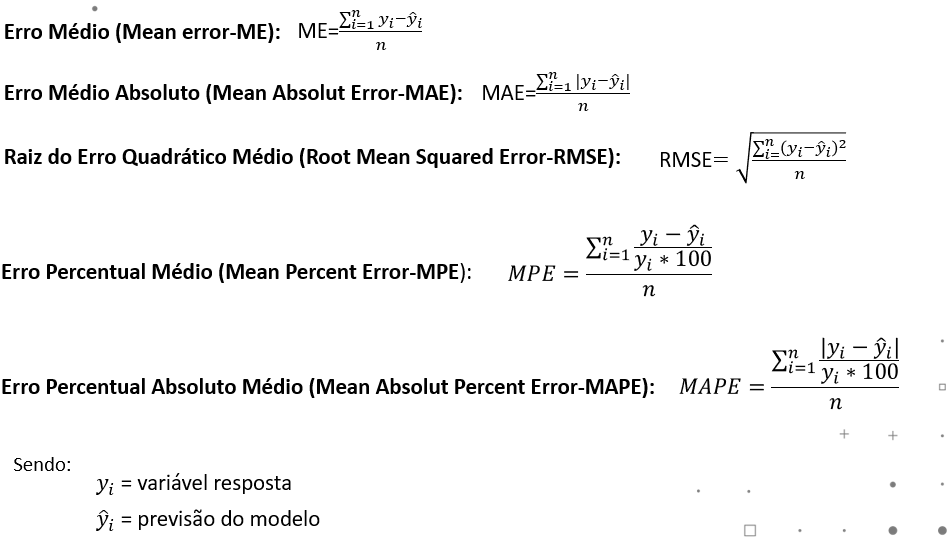

In [77]:
# Medidas de erro na amostra treino
me1   = round((y_train-y_train_pred).mean(),2)
mae1  = (mean_absolute_error(y_train, y_train_pred)).round(2)
mse1  = (mean_squared_error(y_train, y_train_pred)).round(2)
rmse1  = (np.sqrt(mean_squared_error(y_train, y_train_pred))).round(2)
mpe1  = round(((y_train - y_train_pred)/y_train).mean(),2)
mape1  =  round((mae1/y_train).mean(),2) 


In [78]:
# Medidas de erro na amostra teste
me2   = round((y_test-y_test_pred).mean(),2)
mae2  = (mean_absolute_error(y_test, y_test_pred)).round(2)
mse2  = (mean_squared_error(y_test, y_test_pred)).round(2)
rmse2  = (np.sqrt(mean_squared_error(y_test, y_test_pred))).round(2)
mpe2  = round(((y_test - y_test_pred)/y_test).mean(),2)
mape2  =  round((mae2/y_test).mean(),2) 


In [79]:
list1 = [me1, mae1,mse1,rmse1,mpe1, mape1]
list2 = [me2, mae2,mse2,rmse2,mpe2, mape2]
pd.DataFrame({"treino":list1, "teste": list2})

,treino,teste
0,0.00,178.97
1,566.28,571.49
2,594473.11,566598.26
3,771.02,752.73
4,-0.31,0.03
5,0.22,0.17


In [ ]:
## Conclusão dos resultados da amostra treino e teste
## (1) Note que o rmse1 e rmse2 estão próximos, esse resultado mostra que o modelo ajustado na amostra treino tem desempenho
## semlhante na amostra teste. Ou seja, não tem problema de overfitting ou underfitting.
## (2) o mape1 e mape2 estão próximos, ou seja, o erro da  modelo é 22% na amostra treino e 17% na amostra teste. O mape informa
## o erro percentual da quantidade de bikes alugadas.